# Análisis exploratorio de datos 
Parte 4 (Python)

En esta segunda parte del proyecto, se nos han sido porporcionadas datas csv sobre el clima y las compañias de taxis con las que hemos trabajado anteriormente en formato SQL.


Continuaremos con nuestro analisis de forma conveniconal con la ayuda de python, para explicar el impacto climatico en el uso de viajes y el tiempo de recorridos dependiendo el clima.
Se limpiaran los data, se buscará tener los datas listos para su analisis y se crearán gráficas que nos ayuden a entender mejor el comportamiento de las plataformas, si existe alguna relación que afecte o beneficie con el clima y se evaluará la hipótesis sobre si afecta o no el clima en los viajes.

# Descripción de los data 

/datasets/project_sql_result_01.csv. 

Contiene los siguientes datos:

-company_name: nombre de la empresa de taxis

-trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 





/datasets/project_sql_result_04.csv. 


Contiene los siguientes datos:

-dropoff_location_name: barrios de Chicago donde finalizaron los viajes

-average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.






/datasets/project_sql_result_07.csv — 

Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 
Contiene los siguientes datos:

-start_ts: fecha y hora de la recogida

-weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje

-duration_seconds: duración del viaje en segundos

In [1]:
#importan las librerias necesarias 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from datetime import date

In [2]:
#se cargan los archivos

data_compañias = pd.read_csv("/datasets/project_sql_result_01.csv")
data_barrios = pd.read_csv("/datasets/project_sql_result_04.csv")
data_loop_aeropuerto = pd.read_csv("/datasets/project_sql_result_07.csv")


In [3]:
#se analiza el data compañias
data_compañias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#se visualizan las primeras filas
data_compañias.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
#verificar si existen datos duplicados
print(data_compañias.duplicated().sum())

0


Para este data se ha corroborado que esta en buenas condiciones para ser trabajado.
No cuenta con valores ausentes, estan los datos completos, no existen filas duplicadas y el tipo de datos es correcto para ambas columnas.

In [6]:
#se analiza el data_barrios
data_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
#se visualizan las primeras filas
data_barrios.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
#verificar si existen datos duplicados
print(data_barrios.duplicated().sum())

0


Este data igualmente contiene el tipo de datos correctos, al ser un promedio es preferible usar los decimales para no sesgar información sobre el tiempo en los recorridos, no existe ningun duplicado ni dato ausente, por lo que este data esta en condiciones de poderse usar para su analisis.

In [9]:
#se analiza el data loop aeropuerto
data_loop_aeropuerto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
#visualizan las primeras filas del data
data_loop_aeropuerto.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
#verificar si existen valores ausentes
print(data_loop_aeropuerto.isna().sum())

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [12]:
#verificar si existen datos duplicados
print(data_loop_aeropuerto.duplicated().sum())

197


In [13]:
#eliminan las filas duplicadas
data_loop_aeropuerto=data_loop_aeropuerto.drop_duplicates()

In [14]:
#verificar que ya no hay valores ausentes
print(data_loop_aeropuerto.duplicated().sum())

0


In [15]:
#cambiar tipo de la columna start_ts a date time
data_loop_aeropuerto["start_ts"]=pd.to_datetime(data_loop_aeropuerto["start_ts"] , format="%Y-%m-%d")

In [16]:
#modificar los datos de la  columna "duration_seconds" a tipo int 
data_loop_aeropuerto ["duration_seconds"] = data_loop_aeropuerto ["duration_seconds"].astype("int")

In [17]:
#corroborar cambio del tipo 
data_loop_aeropuerto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ KB


In [18]:
#visualiar la tabla para asegurar no hubo cambios con las mejoras
data_loop_aeropuerto

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700
1061,2017-11-18 16:00:00,Bad,2186
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318


En este data a la hora de analizarlo podemos observar que el tipo de dato es correcto para su uso, se convirtio la columna segundos a tipo entero para un mejor analisis, ya que la plataorma redondea los segundos, asi que tener decimlaes no sería útil.
El 18% de los datos de la tabla (197 filas) estaban duplicadas, es por ese motivo que se eliminan, ya que iban a sesgar la información aumnetando el número de viajes realizados, creando datos incorrectos para nuestra hipotesis.
No había valores ausente. Ahora si la tabla esta lista para su uso.

# Análisis de datos

Se crearán gráficos y un análisis que nos ayude a conocer desde lo barrios mas populares donde viajan los usuarios, las empresas de taxis más populares en la ciudad de Chicago, el número de viajes que se realizan por cada empresa. 

Esto con la finalidad de entender un poco al usuario y el uso de la plataforma de taxis en la ciudad.

In [19]:
# se llama a sort para ordenar los datosde de forma descendente y ubicar el promedio y nombres de las empresas más populares en Chicago de Taxis
data_barrios.sort_values(by="average_trips", ascending=False)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [20]:
#se llaman a los primeros  datos de la tabla ordenada para conocr a las 15 empresas más populares de la ciudad
#y conocer el promedio de viajes realizados el 15 y 16 de Nov del 2017.
data_barrios.head(15)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [21]:
#Se crea un filto para identificar los 10 principales barrios en términos de finalización del recorrido
barrios_populares = data_barrios.query("average_trips > 1213")[["dropoff_location_name","average_trips"]]
#se coloca maos a 1213 ya que al ver los datos ordenados podemos ver que de ese promedio en adelante son las 10 empresas más popuales

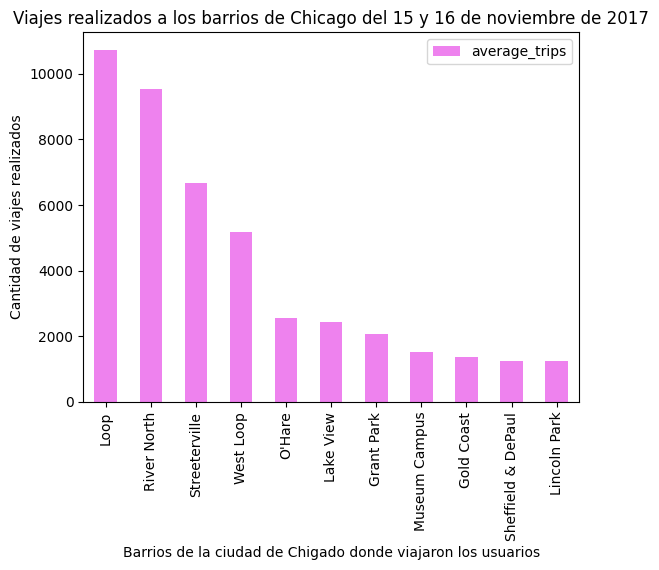

In [22]:
#Se crea un gráfico de barras para mejor visualización de la información solicitada
barrios_populares.plot(x="dropoff_location_name", y="average_trips", kind= "bar", xlabel= "Barrios de la ciudad de Chigado donde viajaron los usuarios",
                   ylabel="Cantidad de viajes realizados",
                   title="Viajes realizados a los barrios de Chicago del 15 y 16 de noviembre de 2017", 
                   color="violet")
plt.show()

Ahora que ya conocemos los barrios más populares donde los usuarios de taxis en Chicago van, vamos a analizar las diferentes empresas que los usuarios preieren utilizar y nuevamente ubicaremos las 10 empresas más populares.
Si observamos y analiamos los 10 lugares más populares podremos entender que estos puntos son lugares turisticos, historicos y los puntos más importantes de la ciudad, zonas donde se desarrolla el comercio local, museos, parques importantes de la ciudad incluido en el sitio 5 el aeropuerto. Lo que nos ayuda a entender porque estos sitios son los más populares, pues pueden ser punto de reunión tanto para locales como extranjeros conociendo la ciudad.

In [23]:
#hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
data_compañias.sort_values(by="trips_amount", ascending=False)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [24]:
data_compañias.head(15)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [25]:
#Se crea un filto para identificar los 10 principales compañias 
compañias_populares = data_compañias.query("trips_amount > 5000")[["company_name","trips_amount"]]
#se coloca maos a 5000 ya que al ver los datos ordenados podemos ver que de ese promedio en adelante son las 10 empresas más popuales

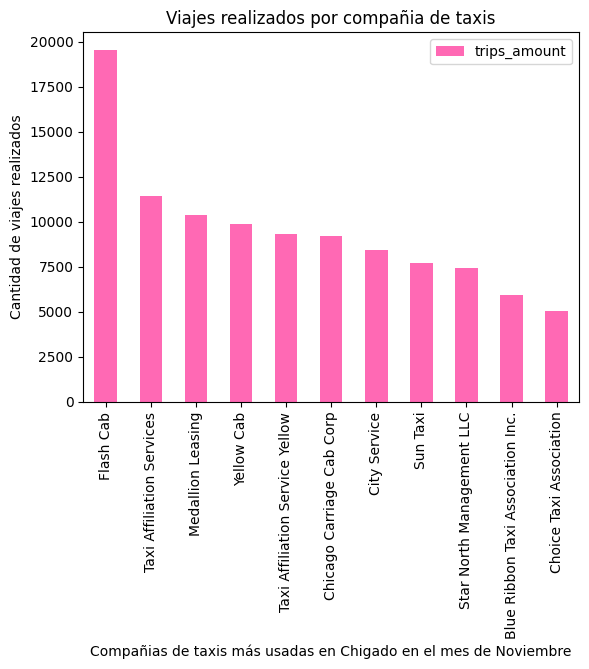

In [26]:
#Se crea un gráfico de barras para mejor visualización de la información solicitada
compañias_populares.plot(x="company_name", y="trips_amount", kind= "bar", xlabel= "Compañias de taxis más usadas en Chigado en el mes de Noviembre" ,
                   ylabel="Cantidad de viajes realizados",
                   title="Viajes realizados por compañia de taxis", 
                   color="hotpink")
plt.show()

La compañia más popular por mucho en el área es Flash Cab, debemos analizar que es lo que hace esta aplicación tan popular.
Después de ella podemos observar que casi todos las plataformas posteriores mantienen un nivel de servicios muy similar, con un promedio de 11000 a 8000 viajes al mes.
Deberiamos analizar si algún dia se busca crecer que es lo que diferencia a Flash Cab de la competencia que lo hace tan superior en su número de servicios mensuales.

Como podemos observar en abas gráficas,la ciudad de Chicago contiene muchos puntos turisticos a visitar, lo cual hace que el servicio de taxis en la ciudad sea tan popular, pues puede ser utiliado por locales como por extranjeros o visitantes que busquen conocer de la cultura y riqueza de esta ciudad.
Los puntos más populares son Loop la zona más centrica  turistica de la ciudad, seguido por parques, museos, lagos y en quinto lugar el aeropuerto de la ciudad.
Esto hace mucho sentido con la solicitud de taxis en la ciudad pues son puntos donde generalmente se llega sin un auto particular.
El aeropuerto al sr el 5to lugar más solicitado para los servicios de taxis nos da un gran margen de datos para su analisis posterior.
Aunque este analisis no revela más que las compañias de taxis más populares en la ciudad, es indicutible que Flas Cab acapará el mayor porcentaje de viajes. Investigar porque es tarea de otro trabajo, pero sin duda, a pesar de las diversas compñias que existen es evidente el favoritismo en la ciudad.

# Prueba de Hipótesis

El data que hemos nombrado como "data_loop_aeropuerto" es el resultado de la última consulta. 


Este data contiene datos sobre viajes desde el barrio Loop hasta el Aeropuerto Internacional O'Hare. Este data ya esta filtrado y nos arroja solo viajes desde los barrios necesarios, se analiarzá que sea solo del día necesario (Sabado) y se buscará si existe alguna relación con el tiempo y si aecta el clima en el mismo

In [27]:
data_loop_aeropuerto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ KB


In [28]:
data_loop_aeropuerto.head

<bound method NDFrame.head of                 start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good              2410
1    2017-11-25 14:00:00               Good              1920
2    2017-11-25 12:00:00               Good              1543
3    2017-11-04 10:00:00               Good              2512
4    2017-11-11 07:00:00               Good              1440
...                  ...                ...               ...
1060 2017-11-04 14:00:00               Good              2700
1061 2017-11-18 16:00:00                Bad              2186
1063 2017-11-25 11:00:00               Good                 0
1064 2017-11-11 10:00:00               Good              1318
1067 2017-11-04 16:00:00                Bad              2834

[871 rows x 3 columns]>

In [29]:
# Crear una nueva columna 'month' que extraiga el mes de la columna 'session_date'
data_loop_aeropuerto['day_of_week'] = data_loop_aeropuerto['start_ts'].dt.weekday

In [30]:
data_loop_aeropuerto

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5
...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700,5
1061,2017-11-18 16:00:00,Bad,2186,5
1063,2017-11-25 11:00:00,Good,0,5
1064,2017-11-11 10:00:00,Good,1318,5


Confirmamos con la nueva columna que este data contiene información de los dias sabados lo que nos indica que este data no necesita más filtros en el día en el que se realizó el viaje para la hipótesis

Para este trabajo nos proponemos averiguar si "La duración promedio de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O'Hare tienen alguna alteración los sábados cuando el clima esta lluvioso (clasificado como Bad)". Con esto en mente podemos platear las siguientes hipotesis:


H0:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare No cambia los días sábados lluviosos"

H1:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

In [31]:

#Y se hace un segundo filtro donde se consideren los viajes que van de Loop hasta el Aeropuerto UNICAMENTE
bad_day = data_loop_aeropuerto[(data_loop_aeropuerto['weather_conditions'] == 'Bad')]["duration_seconds"] 
good_day = data_loop_aeropuerto[(data_loop_aeropuerto['weather_conditions'] == 'Good')]["duration_seconds"] 

#coloca un nivel de significancia estadistica critica del 5%
alpha= 0.05

#mostar resultados
results=st.ttest_ind(bad_day, good_day)

#imrime el valor p
print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la Ho")
    
else:
    print("No se rechaza la Ho")

Valor p: 7.397770692813658e-08
Se rechaza la Ho


— Para esta prueba de hipótesis se buscó conocer si los tiempos en los viajes desde el Barrio Loop hasta el Aeropuerto se veían afectado por las condiciones climitacas buscando entender si un día lluvioso afectaba en el transporte, bucando si los tiempos de transalado son iguales o existen diferencias significativas entre ambos tipos de climas. 

Para esta prueba se dio un 5% de valor alpha de diferencia para poder tener un margén para hacer la prueba.

— Para esta prueba usamos la prueba T de Student, para observar si existen diferencias significtivas entre ambos grupos a comparar (Good and Bad clime) y así poder comprobar si se puede rechazar o aceptar las hipotesis planteadas.

Al realizar las pruebas de estadistica podemos concluir que el clima en la ciudad de Chicago Si afecta los tiempos de translado desde el centro de la ciudad (Loop) hasta el Aeropuerto. Logrando concluir que dependiendo el clima si será afectado el transito en la ciudad. 


Es por esta razón que se rechaza la h0, la cual plantea que: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare No cambia los días sábados lluviosos. O en otras palabras se acpta la H1.

# Conclusion General

La ciudad de Chicago sin duda es un pun turistico que gracias a sus plataformas de taxis logra moviliar a miles de usuarios día a día.
Chicago cuenta con grandes lugares para visitar siendo obvio este punto al observar que los lugares donde finalizan los viajes de los taxis son justo en estos lugares de la ciudad.
Aunque Chicago cuenta con una gran variedad de empresas de taxis es evidente la preerencia por Flash Cab, sería interesante en un futuro analizar esta plataforma cuales son sus beneficios o caracteristicas que lo hacen tan popular, y así lograr una competencia más justa en la ciudad con las demás empresas de taxis.
Un punto importante si deseamos movilizarnos en la ciudad de Chicago como pasa en mucha ciudades metropolitanas del mundo es que el clima SI afecta los tiempos de transalado, sin contar el aumnto de precio que se observa por los tiempos aumentados en transalado. 

Un dato interesante que podemos observar de esta ciudad es que es de suma importancia que si deseamos solicitar un servicio de taxi es importante no solo planear el día pensando en la cercania d elos puntos a visitar pero no debemos olvidar checar el clima y anticipar contratiempos en el tráfico de la ciudad.